In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
training_df = pd.read_csv("train.csv")

In [3]:
training_df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [4]:
training_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

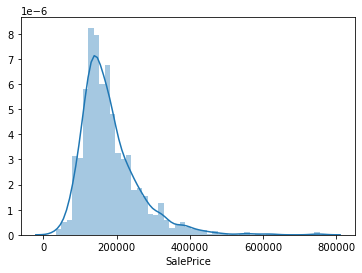

In [5]:
sns.distplot(training_df['SalePrice']);

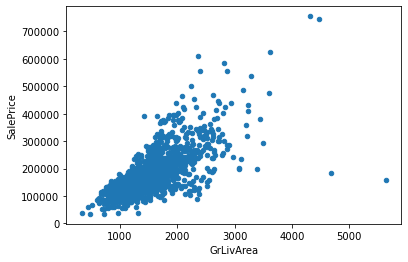

In [6]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

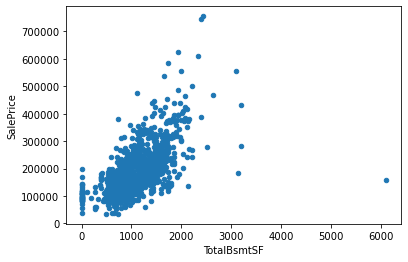

In [7]:
x_var = 'TotalBsmtSF'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

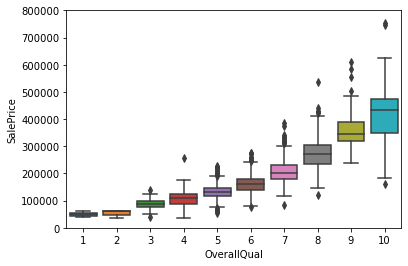

In [8]:
x_var = 'OverallQual'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
f, ax = plt.subplots()
fig = sns.boxplot(x=x_var, y="SalePrice", data=data)
fig.axis(ymin=0,ymax=800000);

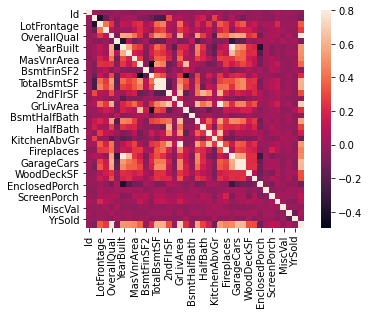

In [9]:
corrmat = training_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=0.8, square=True);

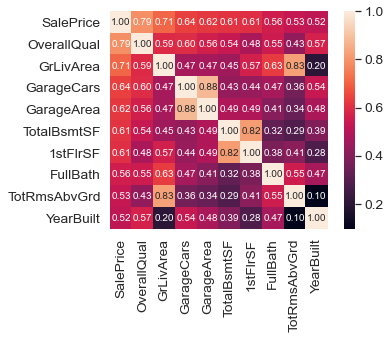

In [10]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values);

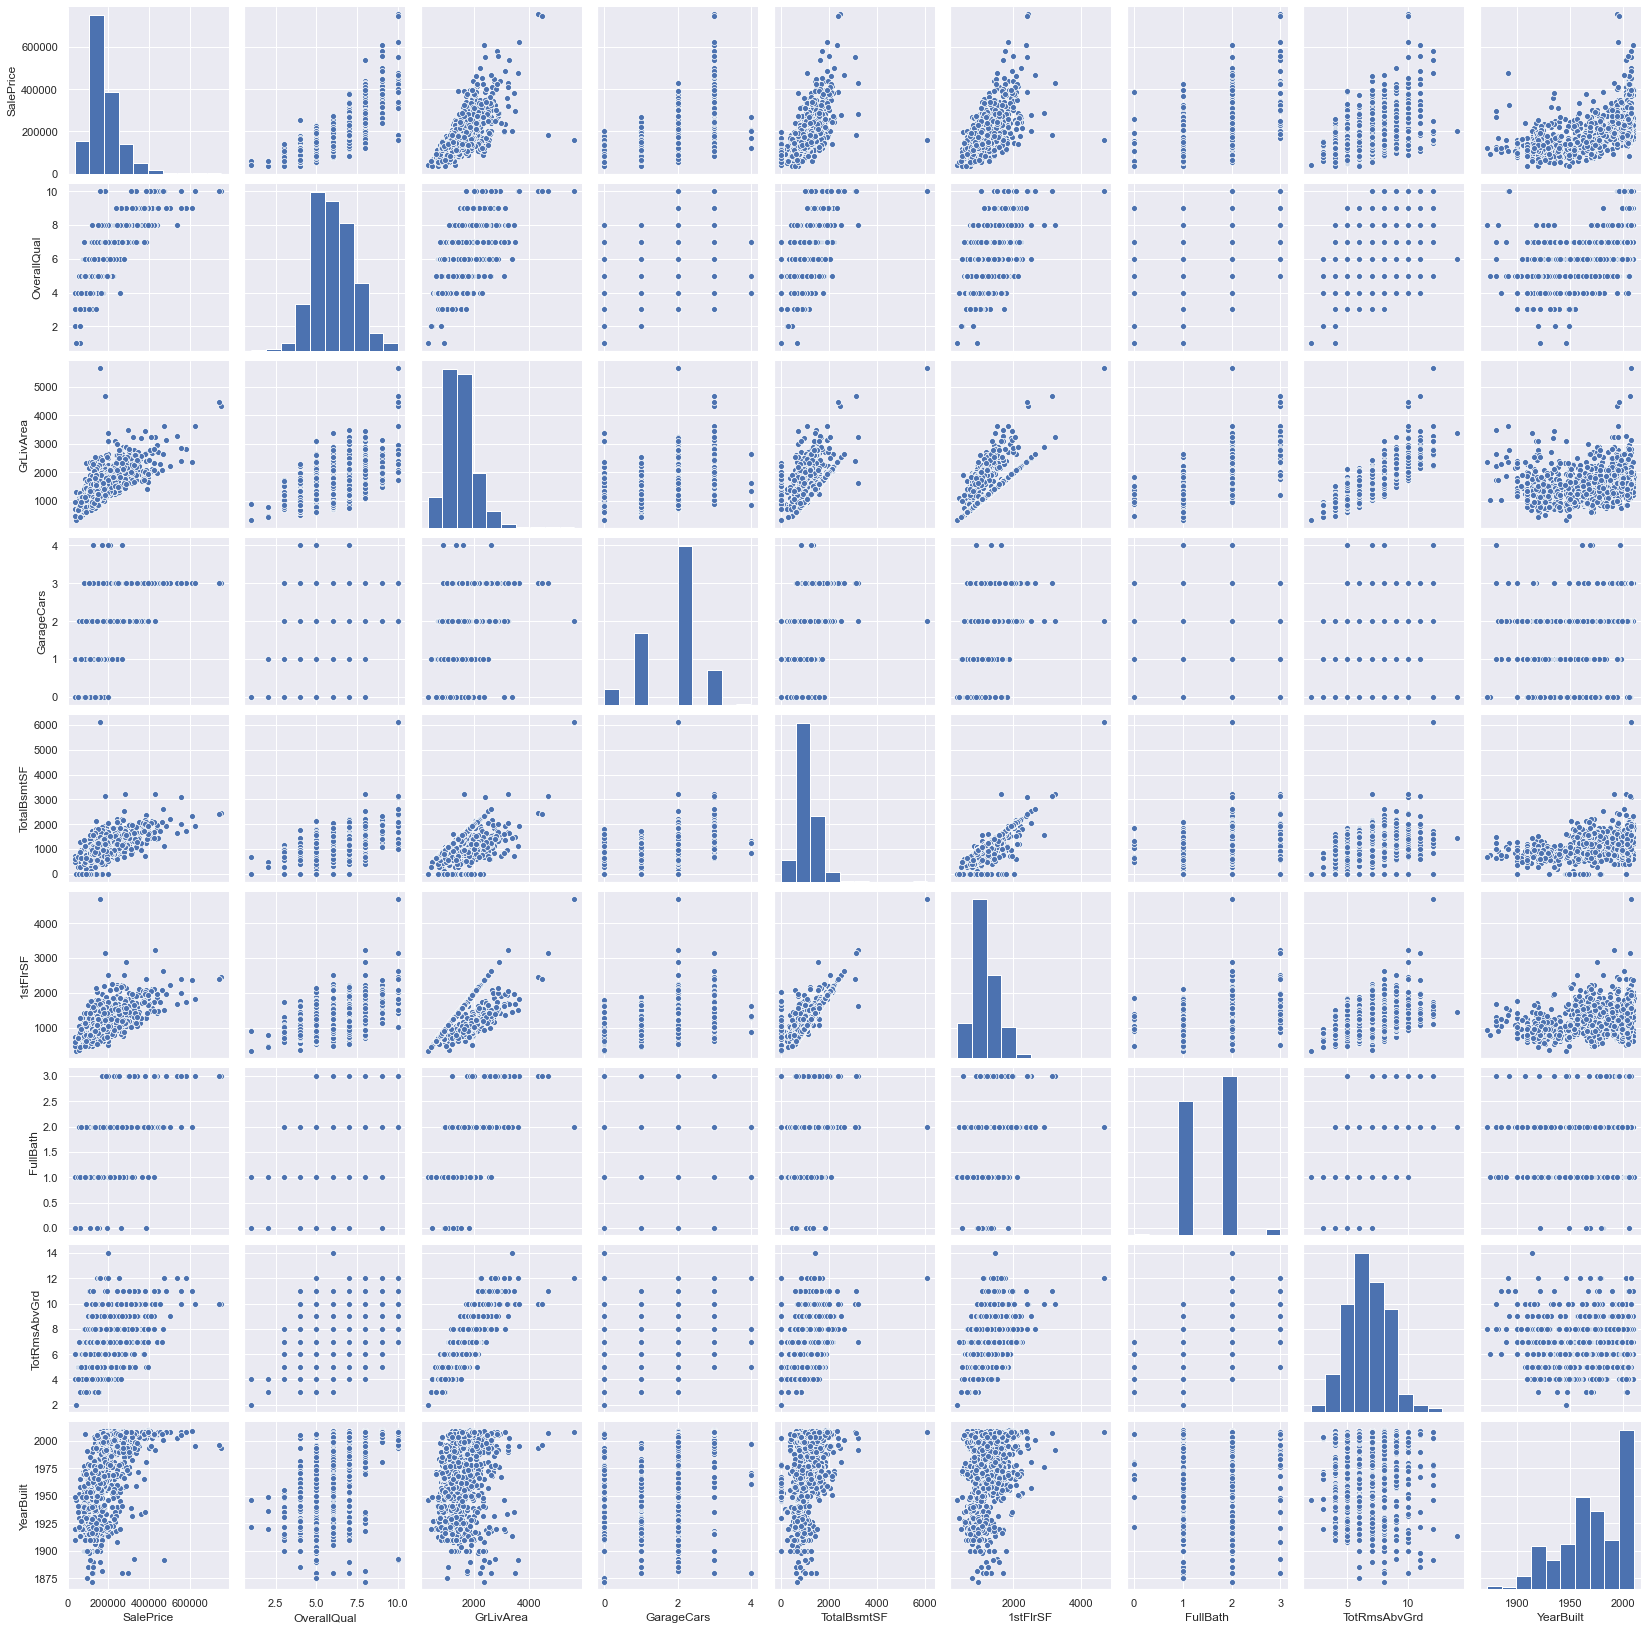

In [11]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(training_df[cols], height = 2.5);

In [12]:
total = training_df.isnull().sum().sort_values(ascending=False)
percent= (training_df.isnull().sum()/training_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
training_df = training_df.drop((missing_data[missing_data['Total']>1]).index,1)
training_df = training_df.drop(training_df.loc[training_df['Electrical'].isnull()].index)
training_df.isnull().sum().max()

0

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
saleprice_scaled = StandardScaler().fit_transform(training_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print(high_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


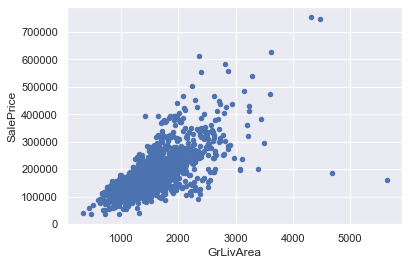

In [16]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

In [17]:
training_df.sort_values(by='GrLivArea',ascending=False)[:2]
training_df = training_df.drop(training_df[training_df['Id']==1299].index)
training_df = training_df.drop(training_df[training_df['Id']==524].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


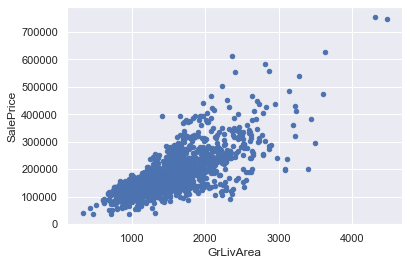

In [18]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


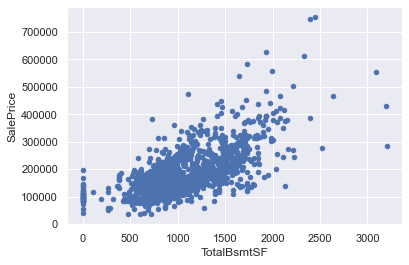

In [19]:
x_var = 'TotalBsmtSF'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

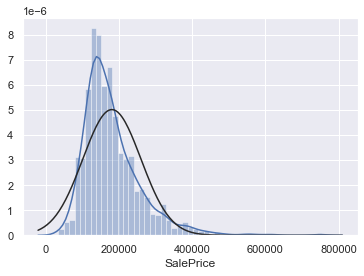

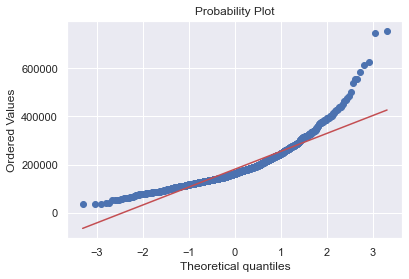

In [22]:
from scipy.stats import norm
from scipy import stats
sns.distplot(training_df.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.SalePrice, plot=plt)

In [23]:
#applying a log transformation
training_df.SalePrice = np.log(training_df.SalePrice)

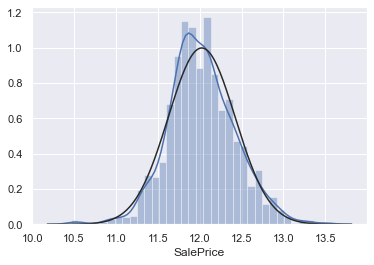

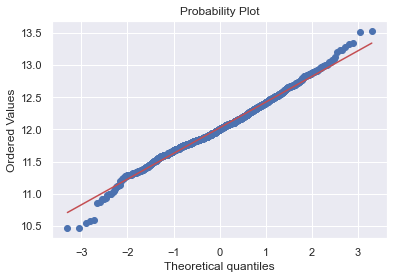

In [24]:
sns.distplot(training_df.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.SalePrice,plot=plt)

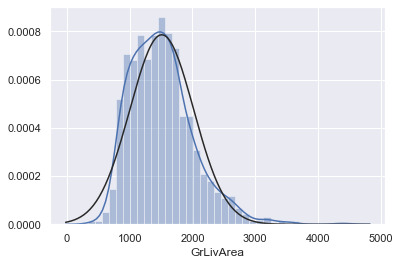

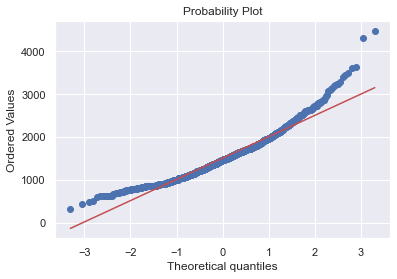

In [25]:
sns.distplot(training_df.GrLivArea,fit = norm);
fig = plt.figure()
res = stats.probplot(training_df.GrLivArea,plot=plt)

In [26]:
training_df.GrLivArea = np.log(training_df.GrLivArea)

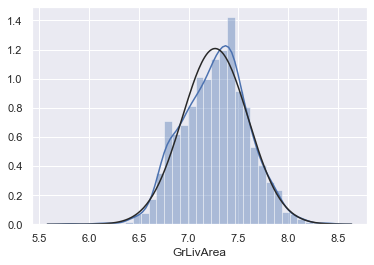

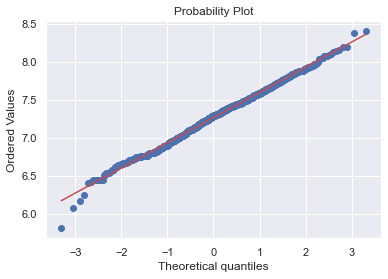

In [27]:
sns.distplot(training_df.GrLivArea, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.GrLivArea,plot=plt)

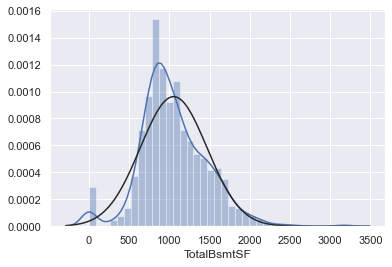

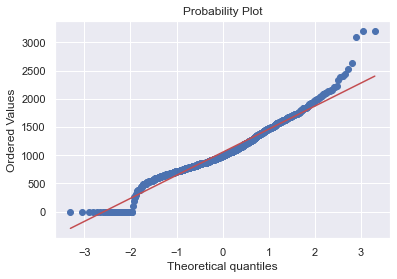

In [28]:
sns.distplot(training_df.TotalBsmtSF,fit = norm);
fig = plt.figure()
res = stats.probplot(training_df.TotalBsmtSF,plot=plt)

In [30]:
training_df['HasBsmt'] = pd.Series(len(training_df.TotalBsmtSF), index = training_df.index)
training_df.HasBsmt = 0
training_df.loc[training_df.TotalBsmtSF>0,'HasBsmt']=1

In [31]:
training_df.loc[training_df.HasBsmt==1,'TotalBsmtSF'] = np.log(training_df.TotalBsmtSF)

C:\Users\chandni\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


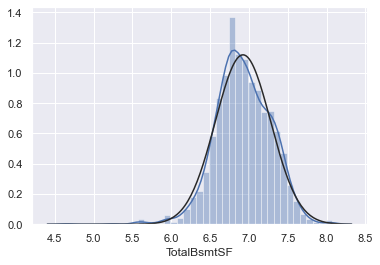

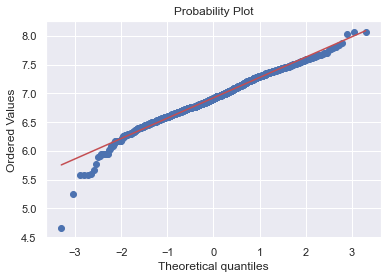

In [33]:
sns.distplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'],plot=plt)

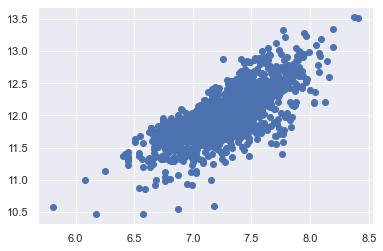

In [34]:
plt.scatter(training_df.GrLivArea,training_df.SalePrice);

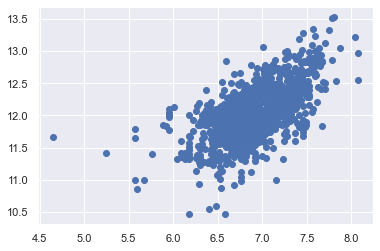

In [35]:
plt.scatter(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'],training_df[training_df.TotalBsmtSF>0]['SalePrice']);

In [36]:
training_df = pd.get_dummies(training_df)

In [37]:
training_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
X = training_df[["OverallQual","GrLivArea","GarageCars","1stFlrSF","FullBath","YearBuilt"]]
y = training_df["SalePrice"]
print(X.shape,y.shape)

(1457, 6) (1457,)


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(X,y)
training_score = model.score(X,y)
print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

Training Score: 0.8370206421914628


In [ ]:
X2 = 
y2 = training_df["SalePrice"].values.reshape(-1,1)